In [9]:
import pandas as pd

# Loading the dataset from an Excel file
file_path = r"C:\Users\IDRESS COMPUTERS\Desktop\Training sets\training set 3.xlsx"  
df = pd.read_excel(file_path)
df


,House Size (sq ft),Price ($)
0,800,150000
1,1200,300000
2,1500,250000
3,2000,400000
4,2500,600000
...,...,...
348,2200,350000
349,1600,250000
350,2800,440000
351,2700,415000


Coefficient (w): 0.9041799877787474
Intercept (b): 0.03242551713070252


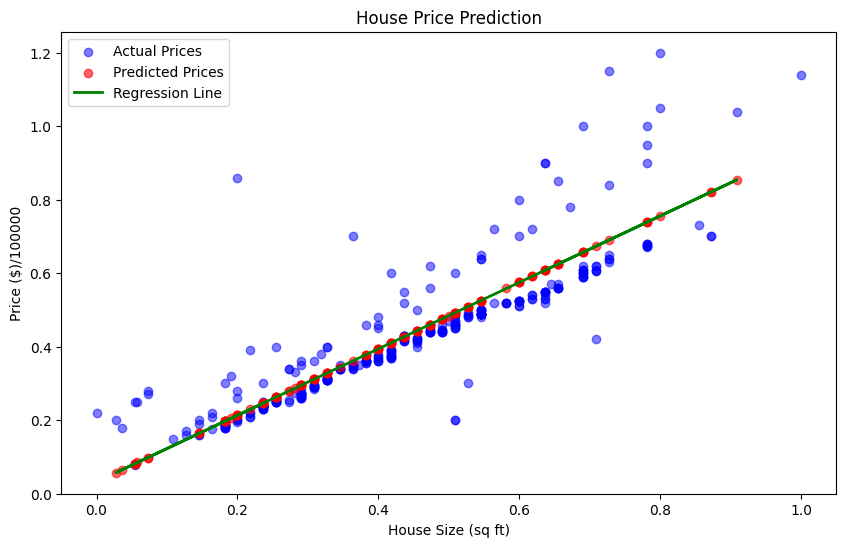

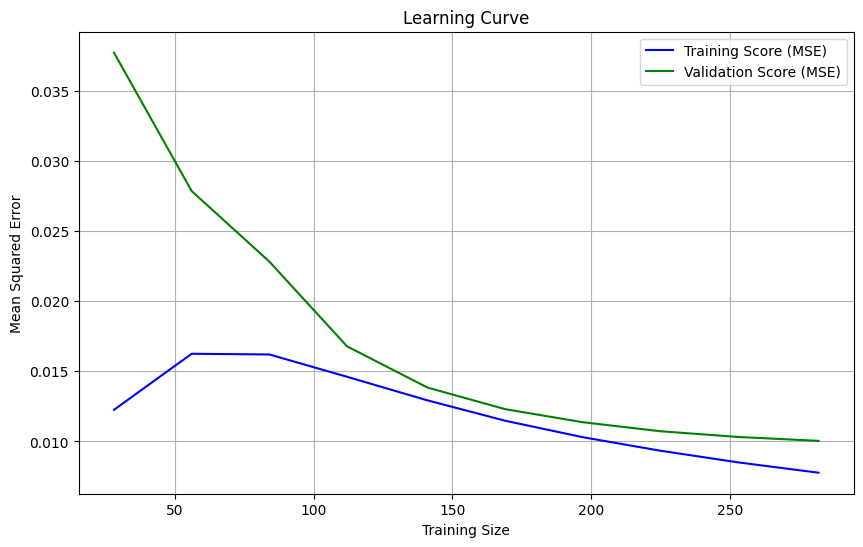

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your dataset (ensure you have df defined)
# df = pd.read_csv('path_to_your_file.csv')  # Uncomment and set the correct path

# Define features and target variable
X = df[['House Size (sq ft)']]
y = df['Price ($)']

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
y = y / 1000000  # Scale target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.4, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Display model parameters
print(f"Coefficient (w): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")

# Plotting the regression line
plt.figure(figsize=(10, 6)) 
plt.scatter(X_normalized, y, color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices', alpha=0.6)
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)/100000')
plt.title('House Price Prediction')
plt.legend()
plt.show()

# Learning Curve Calculation
train_sizes, train_scores, test_scores = learning_curve(model, X_normalized, y,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation for training and test scores
train_mean = -np.mean(train_scores, axis=1)  # Negate to get MSE
test_mean = -np.mean(test_scores, axis=1)

# Plotting the Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score (MSE)', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score (MSE)', color='green')

# Adding labels and title
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

In [3]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
filename = 'Linear regression with loaded dataset(excel)'
with open(filename, 'wb') as file:
    joblib.dump(model, file)

In [5]:
filename = 'Linear regression with loaded dataset(excel)'
loaded_model = joblib.load(filename)

In [6]:
def linear_reg(input):
    input= input.reshape(-1, 1)
    prediction = loaded_model.predict(input)
    return prediction[0]
    

In [7]:
new_data = np.array(int(input('enter inputs:\n')))
prediction = linear_reg(new_data)
print(f"prediction for new values {new_data}: ${prediction:.2f}")

enter inputs:
450
prediction for new values 450: $406.91


In [8]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'MAE:{mae}')
print(f'MSE:{mse}')
print(f'R-Squaerd:{r2}')

MAE:0.05495869155719457
MSE:0.009171931495586894
R-Squaerd:0.722902122631071
